In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")

### Data Description

This is Titanic dataset from [Titanic Machine Learning Competition](https://www.kaggle.com/c/titanic/overview) going on in [Kaggle](https://www.kaggle.com) Data Science Platform.

The challenge is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

#### Description of Features

1. Survival = Survival (0: No, 1: Yes)
2. Pclass = Passenger Class (1: 1st, 2: 2nd, 3: 3rd)
3. Name = Name
4. Sex = Sex (male, female)
5. Age = Age
6. Sibsp = Number of Siblings/Spouses Aboard
7. Parch = Number of Parents/Children Aboard
8. Ticket = Ticket Number
9. Fare = Passenger Fare
10. Cabin = Cabin
11. Embarked = Port of Embarkation (C: Cherbourg, Q: Queenstown, S: Southampton)

**Purpose of Analysis** is to predict the target for test data and upload predictions to **Kaggle Titannic Competition**

### Exploratory Analysis

In [3]:
rawData = pd.read_csv('train.csv')

In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Coverting features into their proper format

rawData['Survived'] = rawData['Survived'].apply(bool)
rawData['Pclass'] = rawData['Pclass'].apply(str)

The train data includes 891 observation and 12 variables.\
Response variable "Survived" is a boolean which takes the value "1" indicating a person survied and "0" if a person died.

In [6]:
rawData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
rawData[['PassengerId', 'Ticket']].nunique()

PassengerId    891
Ticket         681
dtype: int64

Name, PassegerID and Ticket is not important so These can be dropped

In [8]:
rawData = rawData.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

In [9]:
rawData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

 - Here it can be seen that the variable "Age", "Cabin" and "Embarked" contains missing values.\
 - "Cabin" have aroung 80% of missing values so it can be dropped.

In [10]:
rawData = rawData.drop('Cabin', axis=1)

In [11]:
rawData.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age', ylabel='Count'>

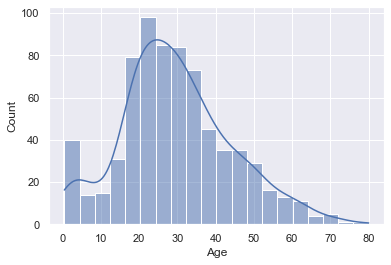

In [12]:
sns.histplot(rawData['Age'], kde=True)

In [13]:
from scipy.stats import normaltest

normaltest(rawData['Age'].dropna())

NormaltestResult(statistic=18.105032952089758, pvalue=0.00011709599657350757)

Age is not normally distributed, So the missing values can be filled with meadian of age

In [14]:
rawData['Age'] = rawData['Age'].fillna(np.median(rawData['Age'].dropna()))

In [15]:
rawData['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Most of the people embarked from location 'S'. So the two missing values can be filled with 'S'.

In [16]:
rawData['Embarked'] = rawData['Embarked'].fillna('S')

In [17]:
rawData.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

There is no missing values anymore, So we can proceed with further EDA

In [18]:
data = rawData.copy()

In [19]:
pd.crosstab(data['Survived'], data['Pclass'], margins=True).T

Survived,False,True,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Here it can be see that survival rate in Pclass 1 is more than Pclass 2 and 3

<AxesSubplot:xlabel='Sex', ylabel='count'>

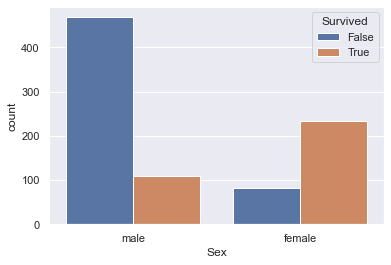

In [20]:
sns.countplot(data['Sex'], hue=data['Survived'])

Survival rate is more in females than males

In [21]:
data.groupby('Survived')['Age'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
False,549.0,30.03,12.50,1.00,23.0,28.0,35.0,74.0
True,342.0,28.29,13.76,0.42,21.0,28.0,35.0,80.0


The survival rate on the basis of age is almost same for both groups

Text(0.5, 1.0, 'Survied')

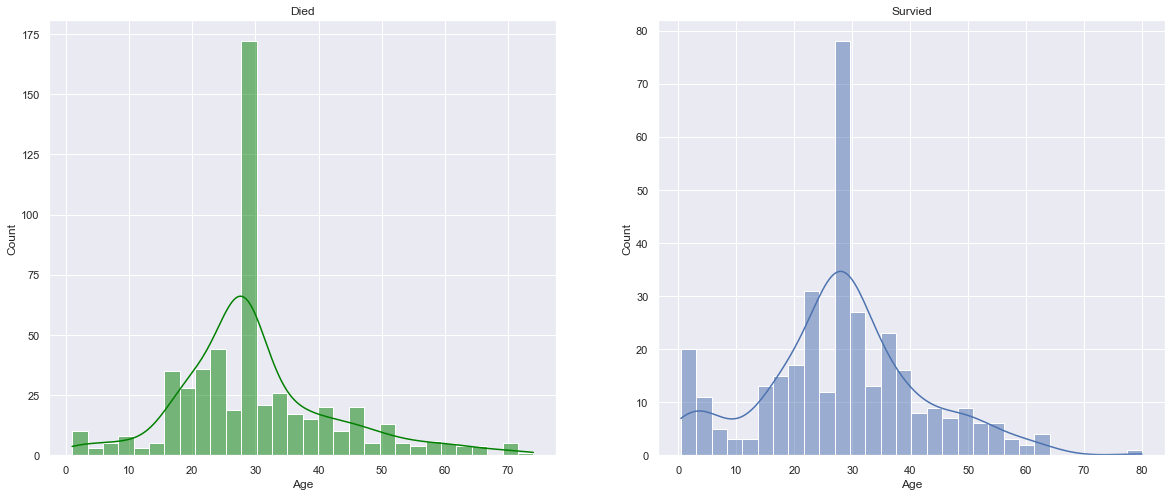

In [22]:
fig, ax = plt.subplots(1,2, figsize=[20, 8])

sns.histplot(data[data['Survived']==0]['Age'], bins=30 ,kde=True, ax=ax[0], color='Green').set_title('Died')
sns.histplot(data[data['Survived']==1]['Age'], bins=30, kde=True, ax=ax[1]).set_title('Survied')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

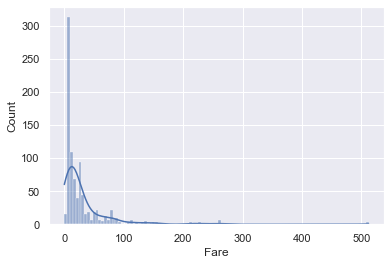

In [23]:
sns.histplot(data['Fare'], kde=True)

The density plot of "Fare" shows that it is right skewed and need some transformation to make it normally distributed

In [24]:
data.groupby('Survived')['Fare'].describe().T.round(2)

Survived,False,True
count,549.00,342.00
mean,22.12,48.40
std,31.39,66.60
min,0.00,0.00
25%,7.85,12.48
50%,10.50,26.00
75%,26.00,57.00
max,263.00,512.33


Description shows that the survial rate increases with an increase in Fare.

In [25]:
data.Survived.value_counts(normalize=True)

False    0.616162
True     0.383838
Name: Survived, dtype: float64

### Modelling

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    bool   
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 49.7+ KB


In [27]:
# Classifying variables according to their types

binary_var = list()
for i in data.columns.values:
    if data[i].nunique() == 2:
        binary_var.append(i)

categorical_var = ['Embarked']
ordinal_var = ['Pclass']
numeric_var =  list(set(data.columns) - set(categorical_var) - set(binary_var) - set(ordinal_var))

In [28]:
# Dummies for features with more nominal variables

data = pd.get_dummies(data, columns = categorical_var, drop_first=True)

In [29]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
lb= LabelBinarizer()
le = LabelEncoder()
oe = OrdinalEncoder()

In [30]:
# encoding ordinal variables

data[ordinal_var] = oe.fit_transform(data[ordinal_var])

In [31]:
# encoding binary variables in '0-1' form

for col in binary_var:
    data[col] = lb.fit_transform(data[col])

In [32]:
# we will use Stratified Shuffle as the classes are imbalanced in target variable

from sklearn.model_selection import StratifiedShuffleSplit

In [33]:
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3)
y, x = data['Survived'], data.drop(columns='Survived')

trainIndex, testIndex = next(strat_shuf_split.split(x, y))

xTrain = x.loc[trainIndex]
yTrain = y.loc[trainIndex]

xTest  = x.loc[testIndex]
yTest  = y.loc[testIndex]

In [34]:
yTrain.value_counts(normalize=True), yTest.value_counts(normalize=True)

(0    0.616372
 1    0.383628
 Name: Survived, dtype: float64,
 0    0.615672
 1    0.384328
 Name: Survived, dtype: float64)

The ratio of both classes are same in train and test set

In [35]:
# Scaling numeric features in data

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
xTrain[numeric_var] = mm.fit_transform(xTrain[numeric_var])
xTest[numeric_var] = mm.transform(xTest[numeric_var])

In [36]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve

In [37]:
# # Defining a Function for our desired error metrics and plotting confusion matrix

# def ClassResult(estimator, xTrain, yTrain, xTest, yTest):
#     estimator.fit(xTrain, yTrain)
#     yPred = estimator.predict(xTest)

#     print(classification_report(yTest, yPred))
#     score_df = pd.DataFrame({'accuracy': accuracy_score(yTest, yPred),
#                          'precision': precision_score(yTest, yPred),
#                          'recall': recall_score(yTest, yPred),
#                          'f1_score': f1_score(yTest, yPred),
#                          'auc': roc_auc_score(yTest, yPred)},
#                          index=pd.Index([0]))

#     print(score_df)

#     _, ax = plt.subplots(figsize=(5,4))
#     ax = sns.heatmap(confusion_matrix(yTest, yPred), annot=True, cmap=colors, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
#     labels = ['False', 'True']
#     ax.set_xticklabels(labels, fontsize=15);
#     ax.set_yticklabels(labels[::-1], fontsize=15);
#     ax.set_ylabel('Prediction', fontsize=20);
#     ax.set_xlabel('Actual', fontsize=20)


# # Defining a function for Percision and recall curves

# def ROC_PRcurve(model, xTest, yTest):

#     fig, axes = plt.subplots(ncols=2)
#     fig.set_size_inches(16, 8)
#     yProb = model.predict_proba(xTest)
    
#     ax = axes[0]
#     fpr, tpr, _= roc_curve(yTest, yProb[:,1])
#     ax.plot(fpr, tpr, color=colors[0], linewidth=5)
#     ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
#     ax.set(xlabel='False Positive Rate',
#         ylabel='True Positive Rate',
#         xlim=[-.01, 1.01], ylim=[-.01, 1.01],
#         title='ROC curve')
#     ax.grid(True)

#     ax = axes[1]
#     precision, recall, _ = precision_recall_curve(yTest, yProb[:,1])
#     ax.plot(recall, precision, color=colors[1], linewidth=5)
#     ax.set(xlabel='Recall', ylabel='Precision',
#         xlim=[-.01, 1.01], ylim=[-.01, 1.01],
#         title='Precision-Recall curve')
#     ax.grid(True)

#     plt.tight_layout()

In [38]:
from helper import colors, ClassResult, ROC_PRcurve
palette = sns.color_palette(colors)

#### Logistic Regression

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       165
           1       0.84      0.77      0.80       103

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268

   accuracy  precision   recall  f1_score       auc
0  0.854478   0.840426  0.76699   0.80203  0.838041


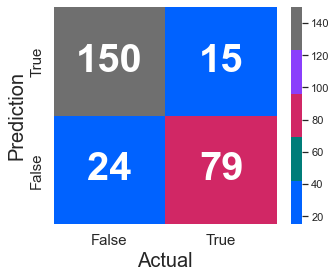

In [39]:
lr = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear')
ClassResult(lr, xTrain, yTrain, xTest, yTest)

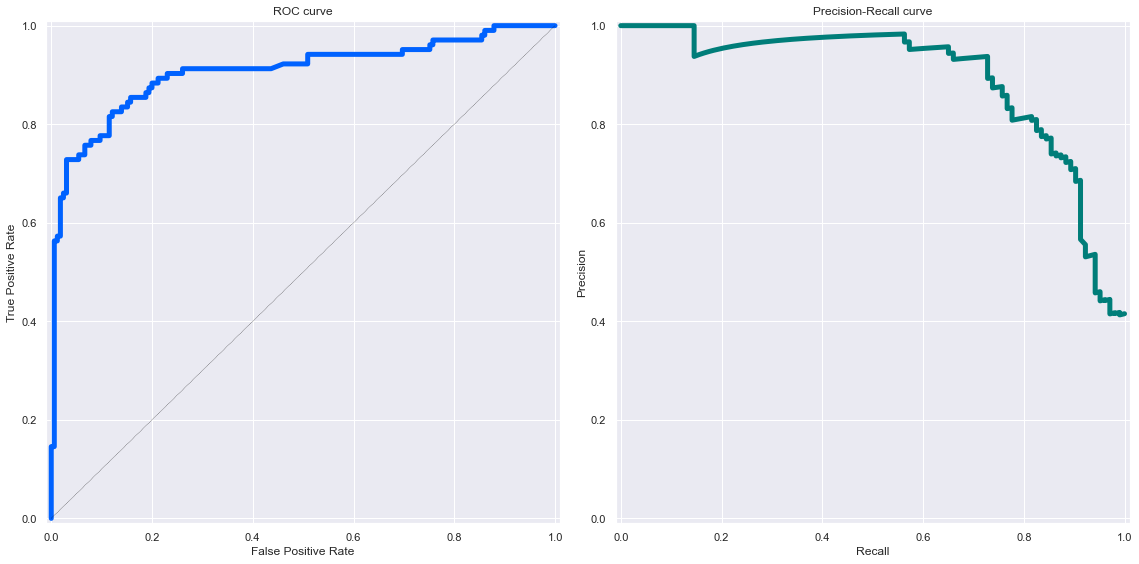

In [40]:
ROC_PRcurve(lr, xTest, yTest)

 - Results shows that the logistic regression with 'l2' penalty is performing well.
 - Recall is high for both classes, which shows that the model is performing very well for imbalanced classes
 - ROC and Percisin Recall curve shows fare trade off between True Positive Rate, False Positive Rate and Percisin, Recall respectively

##### K Nearest Neighbours

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
# Tuning Hyperparametr 'k'

max_k = 30
f1_scores = list()
error_rates = list()

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(xTrain, yTrain)
    
    yPred = knn.predict(xTest)
    f1 = f1_score(yPred, yTest)
    f1_scores.append((k, round(f1_score(yTest, yPred), 4)))
    error = 1-round(accuracy_score(yTest, yPred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

Text(0.5, 1.0, 'KNN F1 Score')

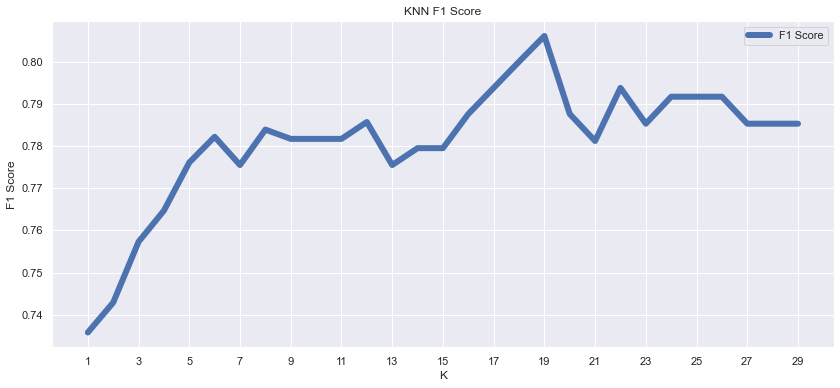

In [43]:
ax = f1_results.set_index('K').plot(figsize=(14, 6), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')

Text(0.5, 1.0, 'KNN Elbow Curve')

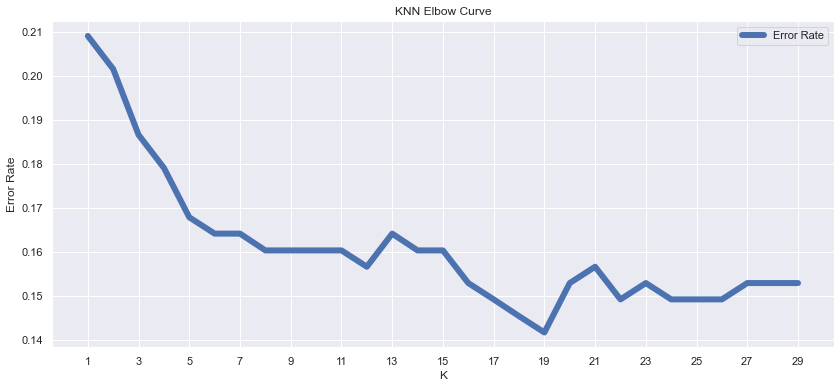

In [44]:
ax = error_results.set_index('K').plot(figsize=(14, 6), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')

Plots show that f1_score is highest at k=15 and error rate is also lowest at k=15

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       165
           1       0.85      0.77      0.81       103

    accuracy                           0.86       268
   macro avg       0.86      0.84      0.85       268
weighted avg       0.86      0.86      0.86       268

   accuracy  precision   recall  f1_score       auc
0  0.858209   0.849462  0.76699  0.806122  0.841071


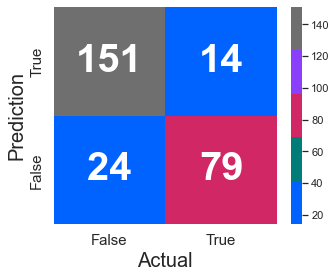

In [70]:
knn = KNeighborsClassifier(n_neighbors=19, weights='distance')
ClassResult(knn, xTrain, yTrain, xTest, yTest)


Knn Model results are similar to Logistic Regression

#### Suppor Vector Machines

##### Linear SVM

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       165
           1       0.81      0.81      0.81       103

    accuracy                           0.85       268
   macro avg       0.85      0.85      0.85       268
weighted avg       0.85      0.85      0.85       268

   accuracy  precision    recall  f1_score       auc
0  0.854478   0.813725  0.805825  0.809756  0.845337


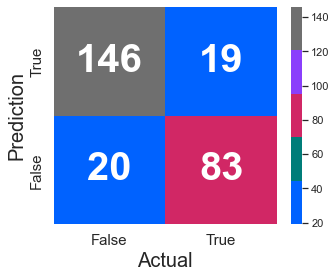

In [46]:
from sklearn.svm import LinearSVC
ClassResult(LinearSVC(), xTrain, yTrain, xTest, yTest)

Linear SVM shows very high results with a balance between sensitivity and specificty. But let's have a look at more complex SVM by training necessary parameter to maximise accuracy

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
gridParameters = {
    'C': [1, 10, 100, 300, 500],
    'gamma': [10, 1, 0.1, 0.01, 0.001]
}

In [49]:
from sklearn.svm import SVC
grid = GridSearchCV(SVC(kernel='rbf'), gridParameters, scoring='accuracy', n_jobs=-1)
grid.fit(xTrain, yTrain)
grid.best_params_

{'C': 1, 'gamma': 1}

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       165
           1       0.92      0.69      0.79       103

    accuracy                           0.86       268
   macro avg       0.88      0.83      0.84       268
weighted avg       0.87      0.86      0.85       268

   accuracy  precision   recall  f1_score       auc
0  0.858209   0.922078  0.68932  0.788889  0.826478


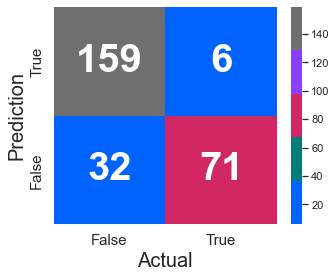

In [71]:
svc = SVC(kernel='rbf', gamma=1, C=1, probability=True)
ClassResult(svc, xTrain, yTrain, xTest, yTest)


Recall for minority class or Specificity is coming very low as SVM is not performing well in prediction minority class

#### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       165
           1       0.73      0.76      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

   accuracy  precision    recall  f1_score       auc
0  0.798507   0.728972  0.757282  0.742857  0.790762


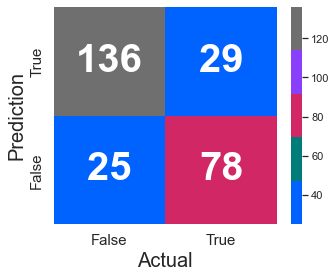

In [52]:
ClassResult(dt, xTrain, yTrain, xTest, yTest)

Tunining Decision Tree hyperparamters

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       165
           1       0.90      0.67      0.77       103

    accuracy                           0.84       268
   macro avg       0.86      0.81      0.82       268
weighted avg       0.85      0.84      0.84       268

   accuracy  precision    recall  f1_score       auc
0  0.843284   0.896104  0.669903  0.766667  0.810709


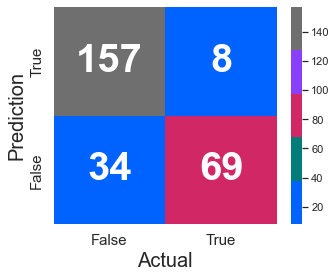

In [53]:
gridParameters = {
    'max_depth':range(1, dt.tree_.max_depth+1),
    'max_features': range(1, len(dt.feature_importances_)+1)
}

GR = GridSearchCV(DecisionTreeClassifier(),
                  param_grid=gridParameters,
                  scoring='accuracy',
                  n_jobs=-1)

ClassResult(GR, xTrain, yTrain, xTest, yTest)

In [54]:
GR.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=8)

Decision tree is performing well, but to introduce more randomness in model, we can try Random Forest and Extra Trees classifiers

#### Ensemble Methods

##### Random Forest and Extra Trees Classfier

In [55]:
# Tuning the hyper parameters for random forest and extra trees classifier

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
trees = [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
oob_list = list()
for n_trees in trees:
    rf = RandomForestClassifier(oob_score=True,
                                n_estimators=n_trees,
                                warm_start=True,
                                n_jobs=-1)
    rf.fit(xTrain, yTrain)

    ef = ExtraTreesClassifier(oob_score=True,
                            n_estimators=n_trees,
                            warm_start=True,
                            bootstrap=True,
                            n_jobs=-1)
    ef.fit(xTrain, yTrain)

    rf_error, ef_error = 1 - rf.oob_score_, 1 - ef.oob_score_
    
    oob_list.append({'Trees': n_trees, 'RF_oob': rf_error, 'EF_oob': ef_error})

oob = pd.DataFrame(oob_list).set_index('Trees')

In [56]:
oob

,RF_oob,EF_oob
Trees,,
15,0.221509,0.247191
20,0.231140,0.226324
30,0.215088,0.218299
40,0.223114,0.226324
50,0.235955,0.215088
100,0.223114,0.221509
150,0.213483,0.213483
200,0.219904,0.211878
300,0.208668,0.213483


Text(0, 0.5, 'Out of Bag Error')

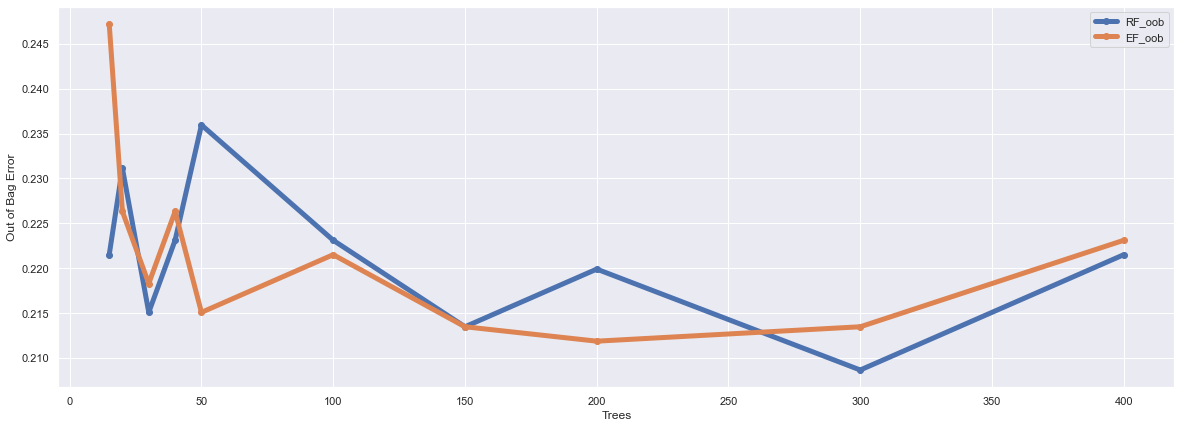

In [57]:
ax = oob.plot(marker='o', figsize=(20, 7), linewidth=5)
ax.set_ylabel('Out of Bag Error')

The plot shows that the random forest classifier is performing well at 300 trees and random forest at 300

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       165
           1       0.81      0.79      0.80       103

    accuracy                           0.85       268
   macro avg       0.84      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268

   accuracy  precision    recall  f1_score       auc
0  0.847015       0.81  0.786408   0.79803  0.835628


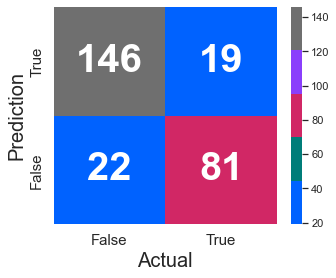

In [72]:
rf = RandomForestClassifier(oob_score=True, n_estimators=300, warm_start=True, n_jobs=-1)
ClassResult(rf, xTrain, yTrain, xTest, yTest)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       165
           1       0.81      0.77      0.79       103

    accuracy                           0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268

   accuracy  precision   recall  f1_score       auc
0  0.839552   0.806122  0.76699   0.78607  0.825919


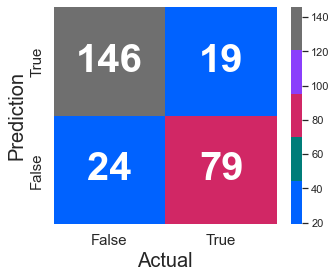

In [59]:
ef = ExtraTreesClassifier(oob_score=True, n_estimators=200, warm_start=True, bootstrap=True, n_jobs=-1)
ClassResult(ef, xTrain, yTrain, xTest, yTest)

[Text(0, 0.5, 'Feature')]

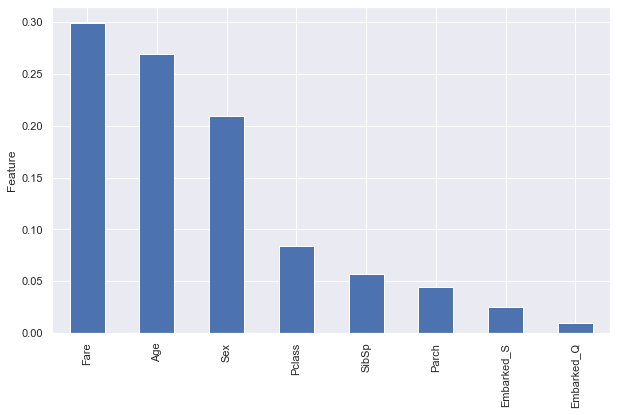

In [73]:
featureImp = pd.Series(rf.feature_importances_, index=xTrain.columns.values).sort_values(ascending=False)

ax = featureImp.plot(kind='bar', figsize=(10, 6))
ax.set(ylabel='Relative Importance')
ax.set(ylabel='Feature')

The feature importance shows that fare is most important variable and than age, sex and so on

#### Boosting

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

Param = {'n_estimators': [10, 15, 30, 50, 100, 200, 400, 600], 'learning_rate': [10, 1, 0.1, 0.01, 0.001, 0.0001]}

gridGBC = GridSearchCV(GradientBoostingClassifier(), 
                      param_grid=Param, 
                      scoring='accuracy',
                      n_jobs=-1)

gridGBC.fit(xTrain, yTrain)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'n_estimators': [10, 15, 30, 50, 100, 200, 400, 600]},
             scoring='accuracy')

In [75]:
gridGBC.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       165
           1       0.88      0.71      0.78       103

    accuracy                           0.85       268
   macro avg       0.86      0.82      0.84       268
weighted avg       0.85      0.85      0.85       268

   accuracy  precision    recall  f1_score       auc
0  0.850746   0.879518  0.708738  0.784946  0.824066


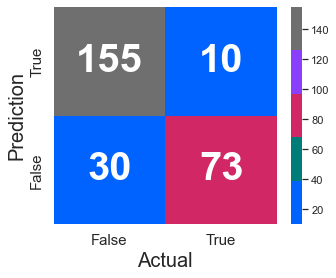

In [76]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01)
ClassResult(gbc, xTrain, yTrain, xTest, yTest)

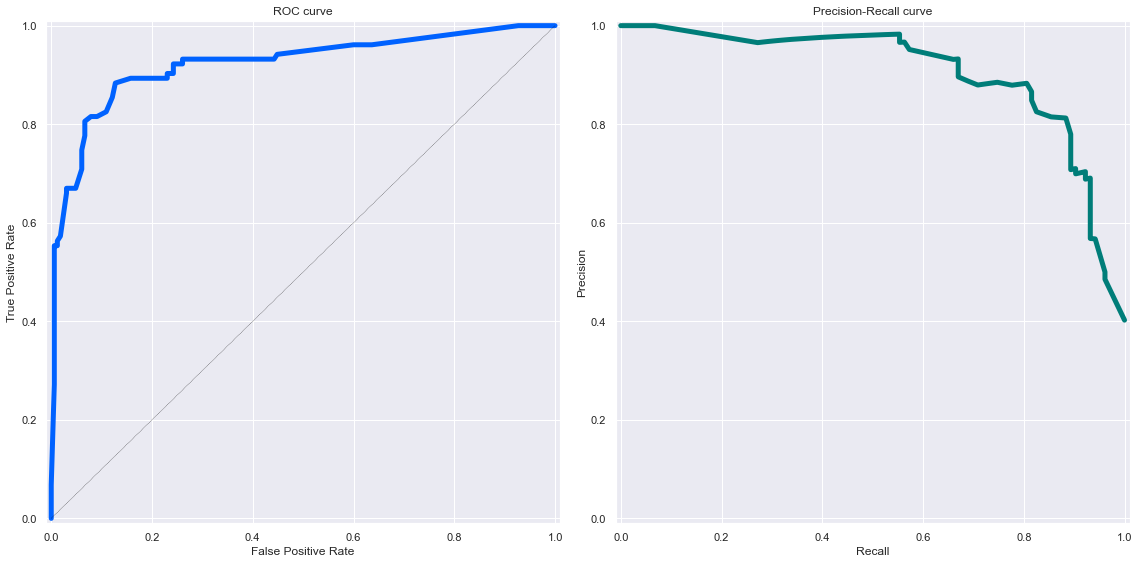

In [77]:
ROC_PRcurve(gbc, xTest, yTest)

##### Conclusion:

 - All of the models are performing well, but some are performing more good in case of percision recall trade off
 - In this case we can use Stacking to make the results of final model high.

In [80]:
from sklearn.ensemble import VotingClassifier

estimators = [('lr', lr), ('knn', knn), ('svc', svc), ('rf', rf), ('ef', ef), ('gbc', gbc)]

vc = VotingClassifier(estimators, voting='soft')
vc.fit(xTrain, yTrain)

VotingClassifier(estimators=[('lr',
                              LogisticRegressionCV(cv=4, solver='liblinear')),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=19,
                                                   weights='distance')),
                             ('svc', SVC(C=1, gamma=1, probability=True)),
                             ('rf',
                              RandomForestClassifier(n_estimators=300,
                                                     n_jobs=-1, oob_score=True,
                                                     warm_start=True)),
                             ('ef',
                              ExtraTreesClassifier(bootstrap=True,
                                                   n_estimators=200, n_jobs=-1,
                                                   oob_score=True,
                                                   warm_start=True)),
                             ('gbc',
                 

#### Predicting Test Data

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       165
           1       0.88      0.76      0.81       103

    accuracy                           0.87       268
   macro avg       0.87      0.85      0.85       268
weighted avg       0.87      0.87      0.86       268

   accuracy  precision    recall  f1_score       auc
0  0.865672   0.876404  0.757282    0.8125  0.845307


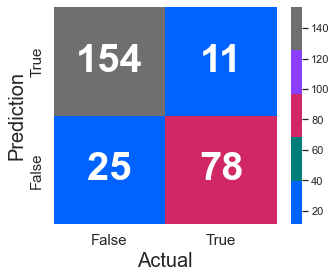

In [81]:
ClassResult(vc, xTrain, yTrain, xTest, yTest)

In [86]:
estimators = [lr, knn, svc, rf, ef, gbc, vc]
labels = ['Logistic Reg', 'KN Neighbours', 'SV Machines', 'Random Forest', 'Extra Tress', 'Gradient Boost', 'Combined']

scores = list()

for est, lab in zip(estimators, labels):
    Accuracy = accuracy_score(yTest, est.predict(xTest))
    Precision = precision_score(yTest, est.predict(xTest))
    Recall = recall_score(yTest, est.predict(xTest))
    F1_score = f1_score(yTest, est.predict(xTest))
    AUC = roc_auc_score(yTest, est.predict(xTest))

    scores.append({'Estimator': lab,
                    'Accuracy': Accuracy,
                    'Precision': Precision,
                    'Recall': Recall,
                    'F1_score': F1_score,
                    'AUC': AUC})

In [87]:
pd.DataFrame(scores).set_index('Estimator')

,Accuracy,Precision,Recall,F1_score,AUC
Estimator,,,,,
Logistic Reg,0.854478,0.840426,0.766990,0.802030,0.838041
KN Neighbours,0.858209,0.849462,0.766990,0.806122,0.841071
SV Machines,0.858209,0.922078,0.689320,0.788889,0.826478
Random Forest,0.847015,0.810000,0.786408,0.798030,0.835628
Extra Tress,0.839552,0.806122,0.766990,0.786070,0.825919
Gradient Boost,0.850746,0.879518,0.708738,0.784946,0.824066
Combined,0.865672,0.876404,0.757282,0.812500,0.845307


In [84]:
# Test data preprocessing

test = pd.read_csv('test.csv')
PassengerId = test['PassengerId']
test['Pclass'] = test['Pclass'].apply(str)
test = test.drop(['Name', 'Cabin','PassengerId', 'Ticket'], axis=1)
test['Age'] = test['Age'].fillna(np.median(test['Age'].dropna()))
test['Fare'] = test['Fare'].fillna(np.median(test['Fare'].dropna()))
test['Embarked'] = test['Embarked'].fillna('S')
test['Sex'] = lb.fit_transform(test['Sex'])
test = pd.get_dummies(test, columns = categorical_var, drop_first=True)
test[ordinal_var] = oe.fit_transform(test[ordinal_var])
test[numeric_var] = mm.transform(test[numeric_var])

In [85]:
Survived = vc.predict(test)
results = pd.DataFrame({'PassengerId': PassengerId, 'Survived': Survived})
results.to_csv('results.csv', mode='w', index=False)